## LOGISTIC REGRESSION FOR BREAST CANCER


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("breast_cancer.csv")
data.head()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
data.shape


(683, 11)

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [12]:
x = data.iloc[:, 1: 10].values
print(x)
print(x.columns)


     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
678                3                        1                         1   
679                2                        1                         1   
680                5                       10                        10   
681                4                        8                         6   
682                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

#### NOTE

1. below we are extracting the dependent variable and storing it in y
2. we cannot use 'print(y.colums)' because y is 1-D numpy array(it does not have column structure) and "columns" attribute is specific to pandas DataFrames and series objects which have more than 1D structure


In [19]:
y = data.iloc[:, -1].values

# print(y.columns)
print(data.columns[-1])


Class


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [37]:
y_pred = classifier.predict(x_test)
print(y_pred)


[4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 4 2 4 2 2 2 4 4 2 2 2 4 4 4 2 2 4
 2 4 4 2 4 4 2 2 4 2 4 2 4 2 2 2 4 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 2 4 2 2 2
 4 4 2 2 4 4 4 4 2 4 2 4 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4
 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 4 4 2 2]


In [38]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)


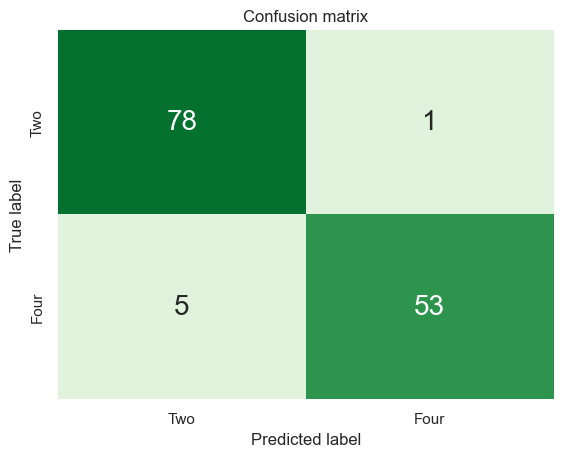

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Two', 'Four']
cmap = sns.color_palette("Greens")
sns.heatmap(cm, annot=True, fmt='', cmap=cmap, xticklabels=categories,
            yticklabels=categories, cbar=False, annot_kws={"size": 20})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()


In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)
print(accuracy)

0.9562043795620438


#### COMPUTING ACCURACY WITH K-FOLD CROSS VALIDATION 

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier ,  X= x_train , y=y_train , cv=10)
print("Accuracy: {:.2f}% ".format(accuracies.mean()*100))
print("Standard Deviation : {:.2f}% ".format(accuracies.std()*100))

Accuracy: 96.71% 
Standard Deviation : 2.13% 
